In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50, resnet50
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import Input
import numpy as np

BS=16
datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = datagenerator.flow_from_directory('./Flowers/Train',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          batch_size=BS,
                                          shuffle='true',
                                          color_mode='rgb')

test_generator = datagenerator.flow_from_directory('./Flowers/Test',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          color_mode='rgb'
                                          )

# res_model = ResNet50(include_top=False, weights="imagenet", input_shape=(128, 128, 3))

# # Make sure the base model's layers are not trainable to not add complexity from there
# for layer in res_model.layers:
#     layer.trainable = False

# model = Sequential()
# model.add(res_model)
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Flatten())
# model.add(Dense(len(train_generator.class_indices), activation="softmax"))

model = Sequential()
# model.add(res_model)  # Base model

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))  # Increased dropout

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.5))  # Additional dropout layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))


model.summary()

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)


2024-03-07 22:52:20.643592: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 22:52:20.643760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 22:52:20.836412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 22:52:21.241838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 22:52:23.540754: W tensorflow/compiler/tf2

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                      

2024-03-07 22:52:26.738339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-07 22:52:27.364031: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-07 22:52:27.364394: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [31]:

from keras.applications import VGG16, ResNet50, ResNet101, InceptionV3, DenseNet121
from keras import regularizers
from keras.callbacks import LearningRateScheduler

     

datagenerator = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = datagenerator.flow_from_directory('./Flowers/Train',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          batch_size=BS,
                                          shuffle='true',
                                          color_mode='rgb')


test_generator = datagenerator.flow_from_directory('./Flowers/Test',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          color_mode='rgb'
                                          )

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


def lr_scheduler(epoch):
    # lr=1e-3
    # if epoch > 80:
    #     lr *= 0.5e-3
    # elif epoch > 60:
    #     lr *= 1e-3
    # elif epoch > 40:
    #     lr *= 1e-2
    # elif epoch > 20:
    #     lr *= 1e-1
    
    return 1.0000e-05

lr_schedul = LearningRateScheduler(lr_scheduler)

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS, callbacks=[lr_schedul])

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/100
38/38 [==============================] - 13s 176ms/step - loss: 50.3183 - accuracy: 0.1683 - val_loss: 48.9366 - val_accuracy: 0.1700 - lr: 1.0000e-05
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 48.1711 - accuracy: 0.2383 - val_loss: 46.9649 - val_accuracy: 0.3150 - lr: 1.0000e-05
Epoch 3/100
38/38 [==============================] - 5s 142ms/step - loss: 46.1633 - accuracy: 0.3250 - val_loss: 45.0965 - val_accuracy: 0.3550 - lr: 1.0000e-05
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 44.3138 - accuracy: 0.4067 - val_loss: 43.3089 - val_accuracy: 0.4900 - lr: 1.0000e-05
Epoch 5/100
38/38 [==============================] - 5s 130ms/step - loss: 42.5960 - accuracy: 0.3817 - val_loss: 41.6383 - val_accuracy: 0.5100 - lr: 1.0000e-05
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 40.8983 - accuracy: 0.4583 - v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


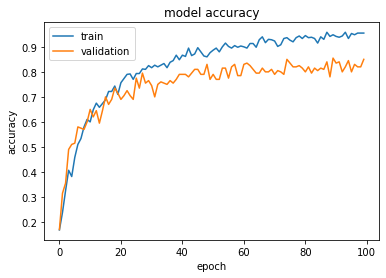

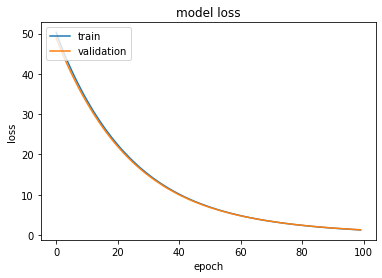

In [32]:
import matplotlib.pyplot as plt

print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()